In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import statistics as st

In [3]:
dataset = pd.read_csv('ds_salaries.csv')
dataset.head()
# print(dataset)

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
x=dataset.sample(30)
x.head()
# print(x)

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
183,183,2021,SE,FT,Finance Data Analyst,45000,GBP,61896,GB,50,GB,L
240,240,2021,SE,FT,Data Scientist,130000,CAD,103691,CA,100,CA,L
465,465,2022,EN,FT,Data Engineer,120000,USD,120000,US,100,US,M
325,325,2022,SE,FT,Data Analyst,124190,USD,124190,US,100,US,M
171,171,2021,MI,FT,Data Engineer,60000,GBP,82528,GB,100,GB,L


In [7]:
x.shape

(30, 12)

In [8]:
datas = x['salary_in_usd']
datas.head

<bound method NDFrame.head of 183     61896
240    103691
465    120000
325    124190
171     82528
398    215300
341     93700
103     62000
202     37825
111    113476
0       79833
527    135000
540    115934
589     60000
266     93150
461    100000
437     87932
472    220000
138    220000
116     50000
488    100000
435     91614
125    151000
128     20000
144    100000
444    215300
80      79197
188     76833
63     412000
55     148261
Name: salary_in_usd, dtype: int64>

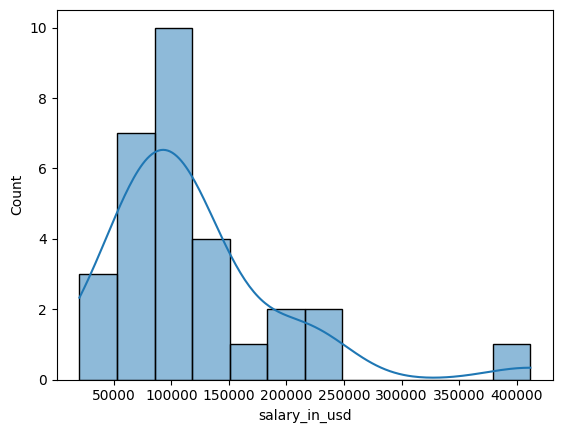

In [9]:
sns.histplot(datas, kde=True)
plt.show()

<AxesSubplot:ylabel='salary_in_usd'>

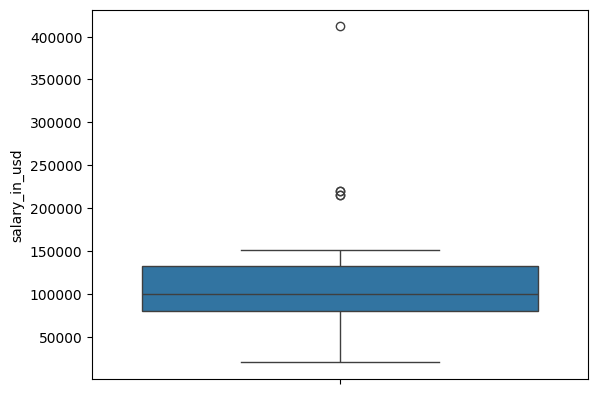

In [10]:
sns.boxplot(x['salary_in_usd'])

In [12]:
mean = np.mean(x['salary_in_usd'])
print(mean)

119022.0


In [13]:
std = np.std(x['salary_in_usd'])
print(std)

74991.5899831441


In [14]:
mode = st.mode(x['salary_in_usd'])
print(mode)

100000


In [15]:
# Detect outliers
THRESHOLD = 3


def detect_outliers(data):
  outliers = []

  # get mean
  mean = np.mean(data)

  # get standard deviation
  std = np.std(data)

  # Apply Z score for each and every point in the datasets.
  for i in data:
    z_score = (i - mean) / std

    # check for outliers
    # append to outlier list in the case of outlier
    if np.abs(z_score) > THRESHOLD:
      outliers.append(i)
  return outliers

In [16]:
outliers = detect_outliers(x['salary_in_usd'])
outliers

[412000]

In [17]:
df= x.sort_values(by='salary_in_usd')
# df.head()
print(df)

      id  work_year experience_level employment_type  \
128  128       2021               EN              FT   
202  202       2021               MI              FT   
116  116       2021               MI              FT   
589  589       2022               SE              FT   
183  183       2021               SE              FT   
103  103       2021               MI              FT   
188  188       2021               SE              FT   
80    80       2021               SE              FT   
0      0       2020               MI              FT   
171  171       2021               MI              FT   
437  437       2022               MI              FT   
435  435       2022               MI              FT   
266  266       2021               MI              FT   
341  341       2022               SE              FT   
461  461       2022               EN              FT   
144  144       2021               MI              FT   
488  488       2022               MI            

<AxesSubplot:ylabel='salary_in_usd'>

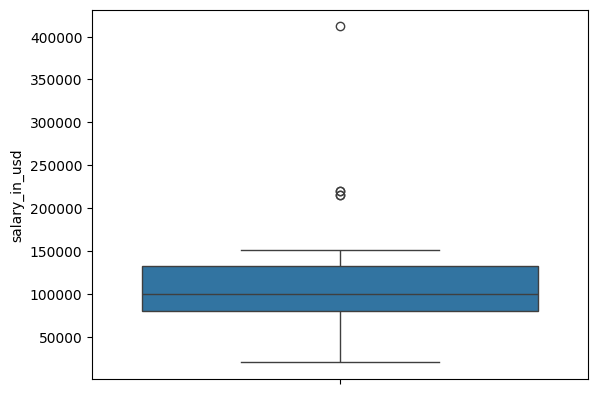

In [18]:
sns.boxplot(df['salary_in_usd'])

In [19]:
Q1, Q3 = np.percentile(df['salary_in_usd'], [25, 75])

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")

Q1: 79356.0
Q3: 132297.5


In [20]:
iqr = Q3 - Q1

print(f"IQR: {iqr}")

IQR: 52941.5


In [21]:
lower_fence = Q1 - (1.5 * iqr)
upper_fence = Q3 + (1.5 * iqr)

print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")

Lower Fence: -56.25
Upper Fence: 211709.75


In [38]:
def detect_outlier_using_iqr(data, iqr, lower_fence, upper_fence):
  outliers = []
  for i in data:
      if isinstance(i, str):
          continue
      if i < lower_fence or i > upper_fence:
          outliers.append(i)

  return outliers

In [40]:
outliers = detect_outlier_using_iqr(df['salary_in_usd'], iqr, lower_fence, upper_fence)
print(f'Detected Outliers:\n {outliers}')

Detected Outliers:
 [215300, 215300, 220000, 220000, 412000]
